In [14]:
#IMPORTING THE LIBRARIES
import math
import pandas_datareader as web 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf


In [174]:
#GETTING THE STOCK QUOTES
df = yf.download('NVDA', start = '2023-06-23', end = '2024-06-11')
df #SHOW DATA

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863464,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104694,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000
...,...,...,...,...,...,...
2024-06-04,115.716003,116.599998,114.044998,116.436996,116.427429,403324000
2024-06-05,118.371002,122.448997,117.468002,122.440002,122.429947,528402000
2024-06-06,124.047997,125.586998,118.320000,120.998001,120.988060,664696000


In [178]:
#DATAFRAME WITH THE CLOSE COLUMN,LENGHT OF OUR DATASET
data = df.filter('close')
dataset = data.values #IN NUMPY ARRAY
training_data_len = math.ceil(len(dataset) * .8) #NO.OF ROWS TO TRAIN ON
training_data_len

195

In [180]:
#SCALE THE DATA
dataset = np.random.rand(247, 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) #min and max values to be used for scaling based on two values
scaled_data

array([[7.68088712e-01],
       [5.57947261e-01],
       [6.92370052e-01],
       [8.44513142e-01],
       [6.67635648e-01],
       [1.15851001e-01],
       [9.35575763e-01],
       [8.41838586e-02],
       [3.52296627e-01],
       [7.52475871e-03],
       [9.16571703e-01],
       [5.00187685e-01],
       [8.76143444e-01],
       [2.19267253e-01],
       [8.20086875e-01],
       [4.52939036e-01],
       [7.98351699e-01],
       [1.29793465e-01],
       [8.02842813e-01],
       [1.46786128e-02],
       [8.78046349e-01],
       [7.83179344e-01],
       [7.02146510e-01],
       [9.57561729e-01],
       [3.36238330e-01],
       [8.84379182e-01],
       [2.45816205e-01],
       [2.11888046e-01],
       [1.10011292e-01],
       [4.36790576e-01],
       [1.14284542e-01],
       [3.92533909e-01],
       [7.45599750e-01],
       [3.60179709e-01],
       [9.05895143e-01],
       [3.01609683e-01],
       [5.75941928e-02],
       [2.60183707e-01],
       [4.26133172e-01],
       [4.02747405e-01],


In [182]:
#CREATE THE TRAINING DATASET
#CREATE THE SCALED TRAINING DATASET
train_data = scaled_data[0:training_data_len,:]
#SPLITTING INTO X AND Y TRAI DATASET
x_train = []
y_train = []
for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.76808871, 0.55794726, 0.69237005, 0.84451314, 0.66763565,
       0.115851  , 0.93557576, 0.08418386, 0.35229663, 0.00752476,
       0.9165717 , 0.50018769, 0.87614344, 0.21926725, 0.82008688,
       0.45293904, 0.7983517 , 0.12979347, 0.80284281, 0.01467861,
       0.87804635, 0.78317934, 0.70214651, 0.95756173, 0.33623833,
       0.88437918, 0.24581621, 0.21188805, 0.11001129, 0.43679058,
       0.11428454, 0.39253391, 0.74559975, 0.36017971, 0.90589514,
       0.30160968, 0.05759419, 0.26018371, 0.42613317, 0.4027474 ,
       0.06050751, 0.18810612, 0.82621084, 0.8188894 , 0.90890204,
       0.02047052, 0.28550359, 0.70569807, 0.13216291, 0.87333714,
       0.12881522, 0.53877871, 0.85020281, 0.06724813, 0.49156326,
       0.41613451, 0.27418299, 0.82709535, 0.44008988, 0.54141418])]
[0.5280766176403093]

[array([0.76808871, 0.55794726, 0.69237005, 0.84451314, 0.66763565,
       0.115851  , 0.93557576, 0.08418386, 0.35229663, 0.00752476,
       0.9165717 , 0.50018769, 0.876

In [183]:
#CONVERT X AND Y INTO NUMPY ARRAY
x_train, y_train = np.array(x_train), np.array(y_train)

In [184]:
#RESHAPE THE DATA
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1) )
x_train.shape #INTO 3D DATASET

(135, 60, 1)

In [231]:
#BUILD THE LSTM MODEL
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\Vipinjot Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [232]:
#COMPILE THE MODEL 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [233]:
#TRAIN THE MODEL
model.fit(x_train, y_train , batch_size=1, epochs=1)

135/135 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.1268


In [234]:
#CREATE THE TESTING DATASET
#CREATE NEW SCALED VALUES ARRAYS WITH FROM INDEX 138 TO 598
test_data= scaled_data [training_data_len - 60:,:]
#CREATE THE DATASET X_TEST AND Y_TEST
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:1,0])

In [235]:
#CONVERT THE DATA NUMPY
from keras.preprocessing.sequence import pad_sequences
x_test = pad_sequences(x_test, maxlen=60)  # pad to a maximum length of 60
x_test = np.array(x_test)
#x_test = np.array(x_test)

In [236]:
#RESHAPING THE DATA
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(52, 60, 1)

In [237]:
#GETTING THE MODEL PREDICTED VALUES
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step


In [239]:
#GET THE ROOT MEAN SQUARED ERROR(RMSE)
rmse = np.sqrt(np.mean(predictions -  y_test) **2)
rmse 
#LOWER RMSE INDICATED A BETETER FIT TO THE MODEL

0.20776809551097736

C:\Users\Vipinjot Singh\AppData\Local\Temp\ipykernel_6676\1493012012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


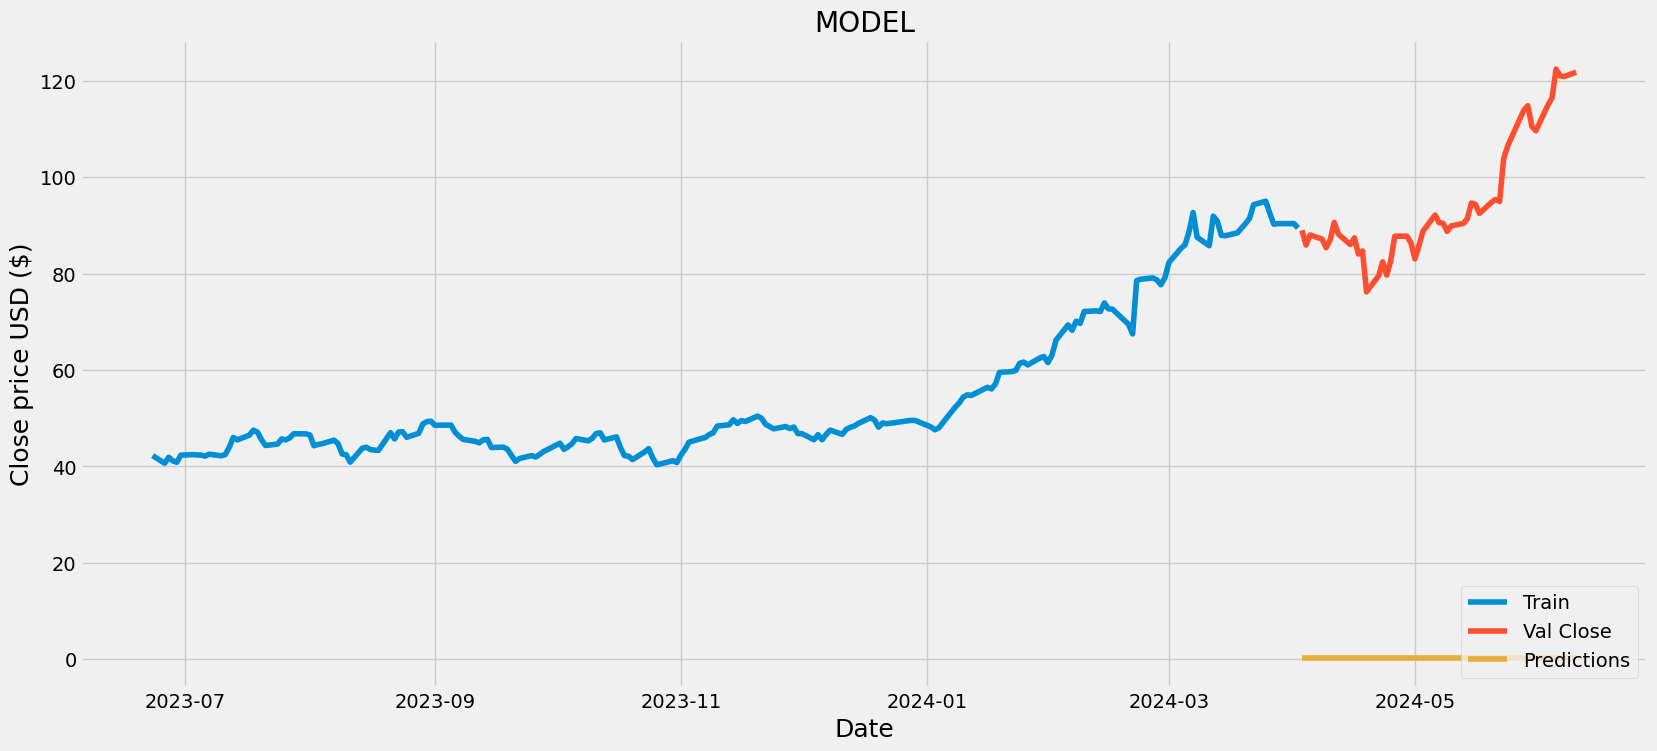

In [247]:
#PLOT THE DATA
train = df[:training_data_len]
validation = df[training_data_len:]
predictions = predictions[:len(validation)]  # Trim predictions to match length of validation
validation['Predictions'] = predictions

#VISUALIZIG THE DATA

plt.figure(figsize=(18, 8))
plt.title('MODEL')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])  # Plot training data Close prices
plt.plot(validation['Close'])  # Plot validation Close prices
plt.plot(validation['Predictions'])  # Plot predictions
plt.legend(['Train', 'Val Close', 'Predictions'], loc='lower right')
plt.show()


In [249]:
#   SHOW THE PREDICTED PRICES
validation

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2024-04-03,88.484001,90.374001,88.400002,88.963997,88.956688,370067000,0.182157
2024-04-04,90.405998,90.634003,85.879997,85.904999,85.897942,434965000,0.182157
2024-04-05,86.865997,88.481003,85.926003,88.008003,88.000778,399678000,0.182157
2024-04-08,88.699997,88.830002,86.732002,87.133003,87.125847,283220000,0.182157
2024-04-09,87.442001,87.635002,83.022003,85.353996,85.346985,503547000,0.182157
2024-04-10,83.926003,87.400002,83.709000,87.039001,87.031853,431929000,0.182157
2024-04-11,87.419998,90.738998,86.926003,90.615997,90.608551,431637000,0.182157
2024-04-12,89.698997,90.175003,87.529999,88.185997,88.178757,426805000,0.182157
2024-04-15,89.098000,90.612999,85.929001,86.000999,85.993935,443077000,0.182157


In [250]:
#QUOTES
nvda_quote = yf.download('NVDA', start = '2023-06-23', end = '2024-06-15')
#CREATE a new dataframw
new_df = nvda_quote.filter(['Close'])
#LAST 60 DAYS VALUES CLOSING
last_60_days = new_df[-60:].values
#SCALING THR DATA 0-1
last_60_days_scaled = scaler.transform(last_60_days)
#CREATE A EMPTY LIST
X_test = []
#APPEND 60 DAYS 
X_test.append(last_60_days_scaled)
#CONVERT THE X TEST DATA SET NUMPY
X_test = np.array(X_test)
#RESHAPING THE DATA
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#PREDICT THE PRICE
pred_price = model.predict(X_test)
#UNDO THE SCALING
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)




[*********************100%%**********************]  1 of 1 completed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[0.8429158]]


In [257]:
nvda_quote2 = yf.download('NVDA', '2023-06-23', end = '2024-06-11')
print(nvda_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-06-23     42.209000
2023-06-26     40.632000
2023-06-27     41.875999
2023-06-28     41.117001
2023-06-29     40.821999
                 ...    
2024-06-04    116.436996
2024-06-05    122.440002
2024-06-06    120.998001
2024-06-07    120.888000
2024-06-10    121.790001
Name: Close, Length: 243, dtype: float64
